In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.unicode_minus'] = False
import warnings
# ÂøΩÁï•ÊâÄÊúâË≠¶Âëä
warnings.filterwarnings("ignore")

# ËØªÂèñËÆ≠ÁªÉÂíåÊµãËØïÊï∞ÊçÆ
X_train = pd.read_excel('X_train_selected.xlsx')  # ËØªÂèñËÆ≠ÁªÉÊï∞ÊçÆÁöÑÁâπÂæÅ
y_train = pd.read_excel('ytrain.xlsx', index_col=0)  # ËØªÂèñËÆ≠ÁªÉÊï∞ÊçÆÁöÑÊ†áÁ¨¨‰∏ÄÂàó‰Ωú‰∏∫Á¥¢Âºï
X_test = pd.read_excel('X_test_selected.xlsx')    # ËØªÂèñÊµãËØïÊï∞ÊçÆÁöÑÁâπÂæÅ
y_test = pd.read_excel('ytest.xlsx', index_col=0)    # ËØªÂèñÊµãËØïÊï∞ÊçÆÁöÑÊ†áÁ≠æÔºåÁ¨¨‰∏ÄÂàó‰Ωú‰∏∫Á¥¢Âºï

OS :  
Ëøô‰∏ÄÂàóË°®Á§∫ÊÇ£ËÄÖÁöÑÊÄªÁîüÂ≠òÊó∂Èó¥ÔºåÂçï‰ΩçÂèØËÉΩÊòØÂ§©Êï∞ÊàñÊúàÊï∞„ÄÇÂÆÉË°®Á§∫‰ªéÊÇ£ËÄÖÂºÄÂßãÊ≤ªÁñóÊàñËØäÊñ≠Êó∂ÔºåÊÇ£ËÄÖÁîüÂ≠òÁöÑÊÄªÊó∂Èïø„ÄÇÂú®Ëøô‰∏™Êï∞ÊçÆÈõÜ‰∏≠ÔºåOS ÂÄºÔºà‰æãÂ¶Ç 43, 33, 32ÔºâË°®Á§∫ÊÇ£ËÄÖÁöÑÁîüÂ≠òÊó∂Èó¥  
OS_State (Overall Survival State):  
Ëøô‰∏ÄÂàóÈÄöÂ∏∏Ë°®Á§∫ÊÇ£ËÄÖÁöÑÁîüÂ≠òÁä∂ÊÄÅ„ÄÇ‰∏ÄËà¨Êù•ËØ¥ÔºåÂÆÉÊúâ‰∏§‰∏™ÂèØËÉΩÁöÑÂèñÂÄºÔºö0ÔºöË°®Á§∫ÊÇ£ËÄÖ‰ªçÁÑ∂Â≠òÊ¥ªÔºàcensored, Âç≥ÁîüÂ≠òÁä∂ÊÄÅÊ≤°ÊúâÂèëÁîüÂèòÂåñÔºâ„ÄÇ1ÔºöË°®Á§∫ÊÇ£ËÄÖÂ∑≤ÁªèÂéª‰∏ñÔºàÊ≠ª‰∫°‰∫ã‰ª∂ÂèëÁîüÔºâ„ÄÇ  
Sample: Ëøô‰∏ÄÂàóÈÄöÂ∏∏Ë°®Á§∫ÊÇ£ËÄÖÁöÑÊ†∑Êú¨ÁºñÂè∑ÊàñÊ†áËØÜÁ¨¶„ÄÇÂÆÉÊúâ‰∏Ä‰∏™Â≠óÊØçÊï∞Â≠óÁªÑÂêàÔºà‰æãÂ¶Ç 130P, 205P Á≠âÔºâÔºåËøô‰∏™ÁºñÂè∑ÂèØ‰ª•ÊòØÊÇ£ËÄÖÁöÑÂîØ‰∏ÄÊ†áËØÜÁ¨¶„ÄÇÂêéÈù¢ÁöÑ P ÂèØËÉΩ‰ª£Ë°®‚ÄúPatient‚ÄùÔºàÊÇ£ËÄÖÔºâÔºåËÄåÊï∞Â≠óÈÉ®ÂàÜÂèØËÉΩ‰ª£Ë°®ËØ•ÊÇ£ËÄÖÁöÑÁâπÂÆöÁºñÂè∑„ÄÇ  

In [2]:
y_train

OS  OS_State Sample
0    43         0   130P
1    33         0   205P
2    32         0    54P
3    35         0   222P
4    43         0    72P
..   ..       ...    ...
116  47         0    49P
117  41         0   132P
118   1         1   161P
119  30         0   210P
120  49         0   192P

[121 rows x 3 columns]

In [3]:
# ‰ªéËÆ≠ÁªÉÂíåÊµãËØïÊï∞ÊçÆ‰∏≠ÊèêÂèñ "Sample" ÂàóÂπ∂Â∞ÜÂÖ∂Âà†Èô§
X_train_sample = X_train["Sample"]  # ÊèêÂèñËÆ≠ÁªÉÊï∞ÊçÆ‰∏≠ÁöÑ Sample Âàó
X_train = X_train.drop(["Sample"], axis=1)  # Âà†Èô§ËÆ≠ÁªÉÊï∞ÊçÆ‰∏≠ÁöÑ Sample Âàó
y_train = y_train.drop(["Sample"], axis=1)  # Âà†Èô§ËÆ≠ÁªÉÊ†áÁ≠æ‰∏≠ÁöÑ Sample Âàó

X_test_sample = X_test["Sample"]  # ÊèêÂèñÊµãËØïÊï∞ÊçÆ‰∏≠ÁöÑ Sample Âàó
X_test = X_test.drop(["Sample"], axis=1)  # Âà†Èô§ÊµãËØïÊï∞ÊçÆ‰∏≠ÁöÑ Sample Âàó
y_test = y_test.drop(["Sample"], axis=1)  # Âà†Èô§ÊµãËØïÊ†áÁ≠æ‰∏≠ÁöÑ Sample Âàó

# Â∞ÜÊ†áÁ≠æËΩ¨Êç¢‰∏∫ NumPy Êï∞ÁªÑ
y_train = np.array(y_train)
y_test = np.array(y_test)

# ËæìÂá∫ËÆ≠ÁªÉÂíåÊµãËØïÊï∞ÊçÆ‰∏≠ÁîüÂ≠òÂíåÊ≠ª‰∫°ÁöÑÊï∞Èáè
print("Train/Test info:")
print("Train, survival-death:", np.unique(y_train[:, 1], return_counts=True))  # ËæìÂá∫ËÆ≠ÁªÉÊï∞ÊçÆ‰∏≠ÁîüÂ≠òÂíåÊ≠ª‰∫°ÁöÑÊï∞Èáè
# ËæìÂá∫ÊµãËØïÊï∞ÊçÆ‰∏≠ÁîüÂ≠òÂíåÊ≠ª‰∫°ÁöÑÊï∞Èáè,np.unique()ÂáΩÊï∞ÂèØ‰ª•ËøîÂõûÊï∞ÁªÑ‰∏≠ÂîØ‰∏ÄÂÄºÂèäÂÖ∂ËÆ°Êï∞ÔºåËøôÊ†∑0Âíå1ÁöÑ‰∏™Êï∞Â∞±ÂèØ‰ª•ÂæóÂà∞
print("Test, survival-death:", np.unique(y_test[:, 1], return_counts=True))  # ËæìÂá∫ÊµãËØïÊï∞ÊçÆ‰∏≠ÁîüÂ≠òÂíåÊ≠ª‰∫°ÁöÑÊï∞Èáè

Train/Test info:
Train, survival-death: (array([0, 1], dtype=int64), array([97, 24], dtype=int64))
Test, survival-death: (array([0, 1], dtype=int64), array([50, 10], dtype=int64))


'cens':  
ÁîüÂ≠òÁä∂ÊÄÅÔºàÂ∏ÉÂ∞îÂÄºÔºâ„ÄÇFalse Ë°®Á§∫ÊÇ£ËÄÖÂ≠òÊ¥ªÔºàÁä∂ÊÄÅ‰∏∫ 0ÔºâÔºåTrue Ë°®Á§∫ÊÇ£ËÄÖÊ≠ª‰∫°ÔºàÁä∂ÊÄÅ‰∏∫ 1Ôºâ  
'time':  
ÁîüÂ≠òÊó∂Èó¥ÔºàÊµÆÂä®Á±ªÂûãÔºâ„ÄÇË°®Á§∫ÊÇ£ËÄÖÁöÑÁîüÂ≠òÊó∂Èó¥ÔºàÂçï‰ΩçÈÄöÂ∏∏ÊòØÂ§©Êï∞ÊàñÊúàÊï∞Ôºâ„ÄÇ‰æãÂ¶ÇÔºå32. Ë°®Á§∫ÊÇ£ËÄÖÁîüÂ≠ò‰∫Ü 32 Â§©

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Â§ÑÁêÜËÆ≠ÁªÉÊ†áÁ≠æÊï∞ÊçÆ
y_train = pd.DataFrame(y_train)  # Â∞ÜËÆ≠ÁªÉÊ†áÁ≠æËΩ¨Êç¢‰∏∫ DataFrame
y_train.columns = ["ST", "State"]  # ‰∏∫ DataFrame ÊåáÂÆöÂàóÂêç

# ÊòæÂºèÂ∞Ü "State" ÂàóÁöÑÁ±ªÂûãËΩ¨Êç¢‰∏∫ intÔºåÂÜçËΩ¨Êç¢‰∏∫ bool Á±ªÂûã
y_train.loc[:, "State"] = y_train.loc[:, "State"].astype(int).astype(bool)  # Â∞Ü "State" ÂàóÁöÑÊï∞ÊçÆÁ±ªÂûãËΩ¨Êç¢‰∏∫Â∏ÉÂ∞îÂÄºÔºàTrue Ë°®Á§∫ÁîüÂ≠òÔºåFalse Ë°®Á§∫Ê≠ª‰∫°Ôºâ

# ÂàõÂª∫‰∏Ä‰∏™ÁªìÊûÑÂåñÁöÑ NumPy Êï∞ÁªÑÔºåÁî®‰∫éÂ≠òÂÇ®ÁîüÂ≠òÊï∞ÊçÆ
train_data = np.zeros(len(y_train), dtype={'names': ('cens', 'time'), 'formats': ('?', '<f8')})  # ÂàõÂª∫‰∏Ä‰∏™Á©∫ÁöÑÁªìÊûÑÂåñÊï∞ÁªÑÔºåÂåÖÂê´‰∏§ÂàóÔºö'cens'ÔºàÁîüÂ≠òÁä∂ÊÄÅÔºâÂíå 'time'ÔºàÁîüÂ≠òÊó∂Èó¥Ôºâ
train_data['cens'] = y_train.loc[:, "State"]  # Â∞Ü "State" ÂàóÊï∞ÊçÆÂ≠òÂÇ®Âà∞ "cens" Â≠óÊÆµ‰∏≠ÔºåË°®Á§∫ÁîüÂ≠òÁä∂ÊÄÅ
train_data['time'] = y_train.loc[:, "ST"]  # Â∞Ü "ST" ÂàóÊï∞ÊçÆÂ≠òÂÇ®Âà∞ "time" Â≠óÊÆµ‰∏≠ÔºåË°®Á§∫ÁîüÂ≠òÊó∂Èó¥
y_train = train_data  # Â∞ÜÁªìÊûÑÂåñÊï∞ÁªÑËµãÂÄºÁªô y_train

# Â§ÑÁêÜÊµãËØïÊ†áÁ≠æÊï∞ÊçÆ
y_test = pd.DataFrame(y_test)  # Â∞ÜÊµãËØïÊ†áÁ≠æËΩ¨Êç¢‰∏∫ DataFrame
y_test.columns = ["ST", "State"]  # ‰∏∫ DataFrame ÊåáÂÆöÂàóÂêç

# ÊòæÂºèÂ∞Ü "State" ÂàóÁöÑÁ±ªÂûãËΩ¨Êç¢‰∏∫ intÔºåÂÜçËΩ¨Êç¢‰∏∫ bool Á±ªÂûã
y_test.loc[:, "State"] = y_test.loc[:, "State"].astype(int).astype(bool)  # Â∞Ü "State" ÂàóÁöÑÊï∞ÊçÆÁ±ªÂûãËΩ¨Êç¢‰∏∫Â∏ÉÂ∞îÂÄºÔºàTrue Ë°®Á§∫ÁîüÂ≠òÔºåFalse Ë°®Á§∫Ê≠ª‰∫°Ôºâ

# ÂàõÂª∫‰∏Ä‰∏™ÁªìÊûÑÂåñÁöÑ NumPy Êï∞ÁªÑÔºåÁî®‰∫éÂ≠òÂÇ®ÁîüÂ≠òÊï∞ÊçÆ
test_data = np.zeros(len(y_test), dtype={'names': ('cens', 'time'), 'formats': ('?', '<f8')})  # ÂàõÂª∫‰∏Ä‰∏™Á©∫ÁöÑÁªìÊûÑÂåñÊï∞ÁªÑÔºåÂåÖÂê´‰∏§ÂàóÔºö'cens'ÔºàÁîüÂ≠òÁä∂ÊÄÅÔºâÂíå 'time'ÔºàÁîüÂ≠òÊó∂Èó¥Ôºâ
test_data['cens'] = y_test.loc[:, "State"]  # Â∞Ü "State" ÂàóÊï∞ÊçÆÂ≠òÂÇ®Âà∞ "cens" Â≠óÊÆµ‰∏≠ÔºåË°®Á§∫ÁîüÂ≠òÁä∂ÊÄÅ
test_data['time'] = y_test.loc[:, "ST"]  # Â∞Ü "ST" ÂàóÊï∞ÊçÆÂ≠òÂÇ®Âà∞ "time" Â≠óÊÆµ‰∏≠ÔºåË°®Á§∫ÁîüÂ≠òÊó∂Èó¥
y_test = test_data  # Â∞ÜÁªìÊûÑÂåñÊï∞ÁªÑËµãÂÄºÁªô y_test

y_test  # ËøîÂõûÂ§ÑÁêÜÂêéÁöÑÊµãËØïÊ†áÁ≠æÊï∞ÊçÆ

array([(False, 32.), (False, 41.), (False, 53.), (False, 56.),
       (False, 45.), (False, 36.), (False, 38.), (False, 35.),
       (False, 42.), (False, 51.), (False, 49.), (False, 32.),
       (False, 33.), (False, 46.), (False, 54.), ( True, 13.),
       (False,  4.), (False, 49.), (False, 25.), (False, 53.),
       ( True,  5.), (False, 55.), (False, 29.), ( True, 22.),
       (False, 30.), (False, 38.), (False, 40.), (False, 39.),
       (False, 50.), ( True, 51.), (False, 43.), (False, 33.),
       (False, 53.), (False, 52.), (False, 44.), (False, 31.),
       ( True,  3.), (False, 55.), ( True, 29.), (False, 48.),
       (False, 46.), ( True,  9.), (False, 34.), (False, 44.),
       ( True, 17.), (False, 33.), (False, 42.), (False, 44.),
       (False, 46.), (False, 29.), ( True, 34.), (False, 46.),
       (False, 46.), ( True, 11.), (False, 29.), (False, 28.),
       (False, 46.), (False, 54.), (False, 52.), (False, 33.)],
      dtype=[('cens', '?'), ('time', '<f8')])

In [5]:
from sksurv.ensemble import GradientBoostingSurvivalAnalysis

##### settings #####
random_state = 20  # ÊéßÂà∂ÈöèÊú∫ÊÄßÔºåÁ°Æ‰øùÁªìÊûúÂèØÂ§çÁé∞
n_estimators = 1000  # Ê†ëÁöÑÊï∞Èáè
learning_rate = 0.1  # Â≠¶‰π†Áéá
max_depth = 3  # Ê†ëÁöÑÊúÄÂ§ßÊ∑±Â∫¶
min_samples_split = 10  # ÂÜÖÈÉ®ËäÇÁÇπÂàíÂàÜÊâÄÈúÄÁöÑÊúÄÂ∞èÊ†∑Êú¨Êï∞
min_samples_leaf = 15  # Âè∂ËäÇÁÇπÊâÄÈúÄÁöÑÊúÄÂ∞èÊ†∑Êú¨Êï∞
max_features = "sqrt"  # Âú®ÂØªÊâæÊúÄ‰Ω≥ÂàíÂàÜÊó∂ËÄÉËôëÁöÑÁâπÂæÅÊï∞Èáè

# ‰ΩøÁî®ÁîüÂ≠òÊ¢ØÂ∫¶ÊèêÂçáÊú∫ÊãüÂêà‰∏Ä‰∏™Ê®°ÂûãÔºåÂπ∂ÊåáÂÆöÊçüÂ§±ÂáΩÊï∞‰∏∫"coxph"ÔºàCoxÊØî‰æãÈ£éÈô©Ê®°ÂûãÔºâ
gbdt = GradientBoostingSurvivalAnalysis(n_estimators=n_estimators,  # Ê†ëÁöÑÊï∞Èáè
                                        learning_rate=learning_rate,  # Â≠¶‰π†Áéá
                                        max_depth=max_depth,  # ÊúÄÂ§ßÊ†ëÊ∑±Â∫¶
                                        min_samples_split=min_samples_split,  # ÊúÄÂ∞èÊ†∑Êú¨Êï∞
                                        min_samples_leaf=min_samples_leaf,  # ÊúÄÂ∞èÂè∂Â≠êËäÇÁÇπÊ†∑Êú¨Êï∞
                                        max_features=max_features,  # ÊØèÊ¨°ÂàÜË£ÇÊó∂ËÄÉËôëÁöÑÊúÄÂ§ßÁâπÂæÅÊï∞
                                        random_state=random_state,  # ÈöèÊú∫ÁßçÂ≠êÔºåÁ°Æ‰øùÁªìÊûúÂèØÂ§çÁé∞
                                        loss="coxph")  # ÊåáÂÆö‰ΩøÁî®CoxÊØî‰æãÈ£éÈô©Ê®°Âûã‰Ωú‰∏∫ÊçüÂ§±ÂáΩÊï∞

# ËÆ≠ÁªÉÊ®°Âûã
gbdt.fit(X_train, y_train)  # ‰ΩøÁî®ËÆ≠ÁªÉÊï∞ÊçÆÔºàXtrain Âíå ytrainÔºâËÆ≠ÁªÉÁîüÂ≠òÊ¢ØÂ∫¶ÊèêÂçáÊú∫Ê®°Âûã

GradientBoostingSurvivalAnalysis(max_features='sqrt', min_samples_leaf=15,
                                 min_samples_split=10, n_estimators=1000,
                                 random_state=20)

1. ‰∏∫‰ªÄ‰πàÁîüÂ≠òÊ¢ØÂ∫¶ÊèêÂçáÊú∫ÁöÑ‰∏¥Â∫äÂèØËß£ÈáäÊÄßÂ∑ÆÔºü    
Ôºà1ÔºâÂü∫‰∫éÊ†ëÁöÑÊ®°ÂûãÁöÑÈùûÁ∫øÊÄßÁâπÊÄß  
ÁîüÂ≠òÊ¢ØÂ∫¶ÊèêÂçáÊú∫‰ΩøÁî®Ê¢ØÂ∫¶ÊèêÂçáÊ†ëÊ®°ÂûãÔºåÂÆÉÊòØ‰∏ÄÁßçÈùûÁ∫øÊÄßÊ®°ÂûãÔºåÈÄöËøáÂ§ö‰∏™ÂÜ≥Á≠ñÊ†ëÁöÑÈõÜÊàêÊù•È¢ÑÊµãÁîüÂ≠òÈ£éÈô©„ÄÇ  
Ê†ëÊ®°ÂûãÊó†Ê≥ïÂÉèÁ∫øÊÄßÊ®°ÂûãÈÇ£Ê†∑Áõ¥Êé•ÁªôÂá∫ÊØè‰∏™ÁâπÂæÅÂØπÈ£éÈô©ÁöÑ‚ÄúÁ∫øÊÄßÂΩ±Âìç‚ÄùÔºàÂ¶Ç Cox Ê®°ÂûãÁöÑ exp(Œ≤)Ôºâ„ÄÇ  
Ôºà2ÔºâÁâπÂæÅ‰∫§‰∫íËá™Âä®Â§ÑÁêÜ  
Ê†ëÊ®°Âûã‰ºöËá™Âä®ÊçïÊçâÁâπÂæÅ‰πãÈó¥ÁöÑÂ§çÊùÇ‰∫§‰∫íÂÖ≥Á≥ªÔºàÂ¶ÇÂπ¥ÈæÑÂíåÊÄßÂà´‰πãÈó¥ÁöÑ‰∫§‰∫íÔºâÔºå‰ΩÜËøôÁßç‰∫§‰∫íÂÖ≥Á≥ªÊòØÈöêÂºèÁöÑÔºåÊó†Ê≥ïÂÉè Cox Ê®°ÂûãÈÇ£Ê†∑ÈÄöËøáÁ≥ªÊï∞Áõ¥Êé•Ë°®Ëææ  
Ôºà3ÔºâÁº∫‰πèÊòéÁ°ÆÁöÑÁªüËÆ°Êé®Êñ≠  
Cox Ê®°ÂûãÂèØ‰ª•Êèê‰æõ p ÂÄº„ÄÅÁΩÆ‰ø°Âå∫Èó¥„ÄÅÈ£éÈô©ÊØîÔºàHRÔºâ Á≠âÁªüËÆ°ÊåáÊ†áÔºå‰æø‰∫éËøõË°åÂÅáËÆæÊ£ÄÈ™å„ÄÇ  
ËÄåÁîüÂ≠òÊ¢ØÂ∫¶ÊèêÂçáÊú∫Âè™ËÉΩÊèê‰æõ ÁâπÂæÅÈáçË¶ÅÊÄßÔºåÊó†Ê≥ïÊèê‰æõÁªüËÆ°ÊòæËëóÊÄß‰ø°ÊÅØ„ÄÇ  
 2. Cox Ê®°ÂûãÁöÑ‰∏¥Â∫äÂèØËß£ÈáäÊÄß‰ºòÂäø  
 Ôºà1ÔºâÊòéÁ°ÆÁöÑÁ≥ªÊï∞Ëß£Èáä  
 Cox Ê®°ÂûãÁöÑÁ≥ªÊï∞ÂèØ‰ª•Áõ¥Êé•Ëß£Èáä‰∏∫Ôºö  
exp(Œ≤) Ë°®Á§∫ËØ•ÁâπÂæÅÊØèÂ¢ûÂä†‰∏Ä‰∏™Âçï‰ΩçÔºåÈ£éÈô©Â¢ûÂä†ÁöÑÂÄçÊï∞„ÄÇ  
‰æãÂ¶ÇÔºöŒ≤ = 0.5 Ë°®Á§∫ËØ•ÁâπÂæÅÊØèÂ¢ûÂä†‰∏Ä‰∏™Âçï‰ΩçÔºåÈ£éÈô©Â¢ûÂä† exp(0.5) ‚âà 1.65 ÂÄç„ÄÇ  
Ôºà2ÔºâÁªüËÆ°ÊòæËëóÊÄßÂàÜÊûê  
Cox Ê®°ÂûãÂèØ‰ª•Êèê‰æõÊØè‰∏™ÁâπÂæÅÁöÑ p ÂÄºÔºåÂà§Êñ≠ÂÖ∂ÊòØÂê¶ÂØπÈ£éÈô©ÊúâÊòæËëóÂΩ±Âìç„ÄÇ  
ËøôÂú®‰∏¥Â∫äÁ†îÁ©∂‰∏≠ÈùûÂ∏∏ÈáçË¶ÅÔºåÂèØ‰ª•Áî®‰∫éÂà§Êñ≠Êüê‰∏™ÁîüÁâ©Ê†áÂøóÁâ©ÊòØÂê¶ÂÖ∑ÊúâÁªüËÆ°Â≠¶ÊÑè‰πâ„ÄÇ  
Ôºà3ÔºâÈ£éÈô©ÊØîÔºàHazard Ratio, HRÔºâ  
ÂèØ‰ª•Áõ¥Êé•ËÆ°ÁÆóÂá∫ÊØè‰∏™ÁâπÂæÅÁöÑ È£éÈô©ÊØîÔºàHRÔºâÔºå‰æø‰∫é‰∏¥Â∫äÂåªÁîüÁêÜËß£  
3. ÁîüÂ≠òÊ¢ØÂ∫¶ÊèêÂçáÊú∫ÁöÑÂèØËß£ÈáäÊÄßÊîπËøõÊñπÊ≥ï  
ËôΩÁÑ∂ÁîüÂ≠òÊ¢ØÂ∫¶ÊèêÂçáÊú∫ÁöÑÂèØËß£ÈáäÊÄß‰∏çÂ¶Ç Cox Ê®°ÂûãÔºå‰ΩÜÂèØ‰ª•ÈÄöËøá‰ª•‰∏ãÊñπÊ≥ïÊèêÂçáÂÖ∂ÂèØËß£ÈáäÊÄßÔºö  

Ôºà1ÔºâÁâπÂæÅÈáçË¶ÅÊÄßÂàÜÊûêÔºàFeature ImportanceÔºâ  
ÂèØ‰ª•‰ΩøÁî®Ê®°ÂûãËá™Â∏¶ÁöÑ feature_importances_ Â±ûÊÄßÔºåÊü•ÁúãÊØè‰∏™ÁâπÂæÅÁöÑÈáçË¶ÅÊÄß„ÄÇ  

Á§∫‰æã‰ª£Á†ÅÔºö  
from sksurv.ensemble import GradientBoostingSurvivalAnalysis  

ËÆ≠ÁªÉÊ®°Âûã  
model = GradientBoostingSurvivalAnalysis()  
model.fit(X_train, y_train)  

Ëé∑ÂèñÁâπÂæÅÈáçË¶ÅÊÄß  
importance = model.feature_importances_  
‰∏¥Â∫äÊÑè‰πâÔºöÂèØ‰ª•ËØÜÂà´Âá∫Âì™‰∫õÁâπÂæÅÂØπÈ¢ÑÊµãÁªìÊûúÂΩ±ÂìçÊúÄÂ§ßÔºå‰ΩÜÊó†Ê≥ïÂà§Êñ≠ÊòØÊ≠£ÂêëËøòÊòØË¥üÂêëÂΩ±Âìç„ÄÇ  

Ôºà2ÔºâSHAP ÂÄºÔºàSHapley Additive exPlanationsÔºâ  
SHAP ÊòØ‰∏ÄÁßçÂü∫‰∫éÂçöÂºàËÆ∫ÁöÑËß£ÈáäÊñπÊ≥ïÔºåÂèØ‰ª•Ëß£ÈáäÊØè‰∏™ÁâπÂæÅÂØπÈ¢ÑÊµãÁªìÊûúÁöÑÂÖ∑‰ΩìÂΩ±Âìç„ÄÇ  

Á§∫‰æã‰ª£Á†ÅÔºö  
import shap  

‰ΩøÁî® SHAP Ëß£ÈáäÂô®  
explainer = shap.TreeExplainer(model)  
shap_values = explainer.shap_values(X_test)  

ÂèØËßÜÂåñÊüê‰∏™Ê†∑Êú¨ÁöÑ SHAP ÂÄº  
shap.initjs()  
shap.force_plot(explainer.expected_value, shap_values[0, :], X_test.iloc[0, :])  
Ôºà3ÔºâÈÉ®ÂàÜ‰æùËµñÂõæÔºàPartial Dependence Plot, PDPÔºâ  
ÂèØ‰ª•Â±ïÁ§∫Êüê‰∏™ÁâπÂæÅÂØπÈ£éÈô©ÁöÑÂΩ±ÂìçË∂ãÂäø„ÄÇ  
 
Á§∫‰æã‰ª£Á†ÅÔºö  
from sklearn.inspection import PartialDependenceDisplay  

ÁªòÂà∂Êüê‰∏™ÁâπÂæÅÁöÑ PDP  
PartialDependenceDisplay.from_estimator(model, X_train, features=[0])  
‰∏¥Â∫äÊÑè‰πâÔºöÂèØ‰ª•Âà§Êñ≠Êüê‰∏™ÁâπÂæÅÂØπÈ£éÈô©ÁöÑÂΩ±ÂìçÊòØÁ∫øÊÄß„ÄÅÈùûÁ∫øÊÄß„ÄÅËøòÊòØÂ≠òÂú®ÈòàÂÄºÊïàÂ∫î„ÄÇ  
Cox Ê®°Âûã ÈÄÇÂêàÁî®‰∫éÈúÄË¶ÅÊòéÁ°ÆËß£ÈáäÁöÑÁ†îÁ©∂ÔºàÂ¶ÇÊñ∞ËçØÁñóÊïàËØÑ‰º∞„ÄÅÁîüÁâ©Ê†áÂøóÁâ©Á≠õÈÄâÔºâ  
ÁîüÂ≠òÊ¢ØÂ∫¶ÊèêÂçáÊú∫  ÈÄÇÂêàÁî®‰∫éÈ¢ÑÊµãÂª∫Ê®°ÔºàÂ¶ÇÊÇ£ËÄÖÈ¢ÑÂêéÈ¢ÑÊµã„ÄÅÂ§çÂèëÈ£éÈô©È¢ÑÊµãÔºâ

In [6]:
c_index = gbdt.score(X_test, y_test)
# ËØÑ‰º∞ÁîüÂ≠òÊ¢ØÂ∫¶ÊèêÂçáÊú∫ÔºàGBDT-SurvivalÔºâÊ®°ÂûãÂú®ÊµãËØïÊï∞ÊçÆÈõÜ‰∏äÁöÑÈ¢ÑÊµãÊÄßËÉΩ
f"{c_index:.5f}"

'0.74327'

In [7]:
X_test_sel = X_test.iloc[0:5,:]
X_test_sel

SDMA-ADMA_pos-140  Thymine_pos-150  Neopterin_pos-117  \
0           0.001227         0.000079           0.000054   
1           0.001372         0.000038           0.000117   
2           0.000749         0.000095           0.000060   
3           0.001234         0.000145           0.000041   
4           0.001414         0.000435           0.000080   

   Hydroxyproline_pos-095  Carnitine-C14_pos-049  Carnitine-C8_pos-056  \
0                0.000770               0.000015              0.001447   
1                0.000886               0.000008              0.002275   
2                0.000712               0.000003              0.001730   
3                0.001038               0.000335              0.002230   
4                0.001642               0.000036              0.002063   

   Cystine_pos-068  AICAR_pos-034  Uridine_neg-088  \
0         0.001787       0.000069         0.000554   
1         0.001504       0.000055         0.000369   
2         0.000558       0.000022         0.000201   
3         0.000955       0.000061         0.000523   
4         0.001385       0.000057         0.000530   

   N-Acetyl-D-glucosamine 6-phosphate_neg-061  ...  \
0                                    0.000362  ...   
1                                    0.000198  ...   
2                                    0.000140  ...   
3                                    0.000118  ...   
4                                    0.000179  ...   

   S-(5'-Adenosyl)-L-homocysteine_neg-075  Phenylalanine_pos-127  NR_pos-175  \
0                                0.000010               0.111599    0.000087   
1                                0.000009               0.117633    0.000083   
2                                0.000027               0.124847    0.000103   
3                                0.000014               0.136285    0.000128   
4                                0.000009               0.118589    0.000166   

   Succinate_neg-079  2-Aminoadipic acid_pos-005  Isoleucine_pos-100  \
0           0.000624                    0.000367            0.078532   
1           0.000492                    0.000333            0.109243   
2           0.001191                    0.000194            0.123497   
3           0.000869                    0.000176            0.062544   
4           0.000384                    0.000323            0.090138   

   Glutamate_neg-044  Serotonin_pos-142  Inosine_pos-099  \
0           0.002082           0.006416         0.000068   
1           0.001870           0.001878         0.000247   
2           0.002272           0.000411         0.000030   
3           0.001284           0.001761         0.000237   
4           0.001067           0.001320         0.000298   

   S-Adenosyl-methionine_pos-139  
0                       0.001546  
1                       0.000944  
2                       0.000467  
3                       0.000100  
4                       0.000928  

[5 rows x 28 columns]

In [8]:
# gbdt ÊòØÂ∑≤ÁªèËÆ≠ÁªÉÂ•ΩÁöÑÊ®°ÂûãÔºåXtest ÊòØÂæÖÈ¢ÑÊµãÁöÑÊµãËØïÊï∞ÊçÆ
# Â¶ÇÊûú return_array=FalseÔºàÈªòËÆ§ÂÄºÔºâÔºö ËøîÂõû‰∏Ä‰∏™ StepFunction ÂØπË±°ÔºåÂÆÉÊòØ‰∏Ä‰∏™‰∏ìÈó®ÁöÑÂØπË±°ÔºåÂåÖÂê´‰∫ÜÁ¥ØÁßØÈ£éÈô©ÂáΩÊï∞ÁöÑ xÔºàÊó∂Èó¥ÁÇπÔºâÂíå yÔºàÂØπÂ∫îÁöÑÁ¥ØÁßØÈ£éÈô©ÂÄºÔºâÊï∞ÁªÑ„ÄÇ
cumulative_hazard = gbdt.predict_cumulative_hazard_function(X_test_sel, return_array=True)

# Êü•ÁúãÈ¢ÑÊµãÁöÑÁ¥ØÁßØÈ£éÈô©ÂáΩÊï∞
print(cumulative_hazard)

[[4.18294950e-04 1.06231464e-03 2.12185725e-03 3.66118774e-03
  1.52324305e-02 2.13767927e-02 3.73224209e-02 6.26067810e-02
  8.24188549e-02 8.24188549e-02 1.32952259e-01 1.69692745e-01
  2.16869748e-01 2.16869748e-01 2.16869748e-01 2.81823451e-01
  4.46826011e-01 4.46826011e-01 5.79179753e-01 5.79179753e-01
  5.79179753e-01 5.79179753e-01 5.79179753e-01 5.79179753e-01
  5.79179753e-01 5.79179753e-01 5.79179753e-01 5.79179753e-01
  5.79179753e-01 5.79179753e-01 8.50848485e-01 8.50848485e-01
  8.50848485e-01 8.50848485e-01 8.50848485e-01 8.50848485e-01
  8.50848485e-01 8.50848485e-01 8.50848485e-01 8.50848485e-01
  8.50848485e-01 8.50848485e-01]
 [3.67765441e-05 9.33988352e-05 1.86553954e-04 3.21892082e-04
  1.33923718e-03 1.87945028e-03 3.28139190e-03 5.50439599e-03
  7.24627600e-03 7.24627600e-03 1.16891792e-02 1.49194073e-02
  1.90672153e-02 1.90672153e-02 1.90672153e-02 2.47779529e-02
  3.92849986e-02 3.92849986e-02 5.09215560e-02 5.09215560e-02
  5.09215560e-02 5.09215560e-02 5.092

Â±ïÁ§∫‰∫Ü‰∏çÂêåÊ†∑Êú¨ÁöÑÁ¥ØÁßØÈ£éÈô©ÂáΩÊï∞ÈöèÊó∂Èó¥ÁöÑÂèòÂåñ„ÄÇÁ¥ØÁßØÈ£éÈô©ÊòØÊåáÊüê‰∏™‰∫ã‰ª∂ÔºàÂ¶ÇÊ≠ª‰∫°„ÄÅÁñæÁóÖÁ≠âÔºâÂú®ÁªôÂÆöÊó∂Èó¥ÂÜÖÁöÑÁ¥ØÁßØÊ¶ÇÁéáÊàñÈ£éÈô©„ÄÇÊ®™ËΩ¥ÊòØÊó∂Èó¥ÔºàÂçï‰ΩçÔºöÂ§©ÔºâÔºåÁ∫µËΩ¥ÊòØÁ¥ØÁßØÈ£éÈô©ÔºåË°®Á§∫ÈöèÁùÄÊó∂Èó¥Êé®ÁßªÔºåÊüê‰∏Ä‰∫ã‰ª∂ÁöÑÂèëÁîüÈ£éÈô©ÈÄêÊ∏êÂ¢ûÂä†„ÄÇÂõæ‰∏≠ÁöÑÊØèÊù°Êõ≤Á∫ø‰ª£Ë°®‰∏Ä‰∏™Ê†∑Êú¨ÁöÑÈ£éÈô©ÂèòÂåñÔºå‰∏çÂêåÈ¢úËâ≤ÁöÑÊõ≤Á∫øÂàÜÂà´‰ª£Ë°®‰∏çÂêåÁöÑÊ†∑Êú¨

ËìùËâ≤Êõ≤Á∫øÔºà157PÔºâÔºö  
ËøôÊù°Êõ≤Á∫øÊòæÁ§∫‰∫ÜËØ•Ê†∑Êú¨ÁöÑÁ¥ØÁßØÈ£éÈô©ÈöèÁùÄÊó∂Èó¥ËøÖÈÄü‰∏äÂçáÔºåË°®ÊòéËØ•Ê†∑Êú¨ÁöÑÈ£éÈô©Âú®ËæÉÁü≠Êó∂Èó¥ÂÜÖÊÄ•ÂâßÂ¢ûÂä†ÔºåÂèØËÉΩÊÑèÂë≥ÁùÄËØ•Ê†∑Êú¨ËæÉÊó©Âá∫Áé∞‰∫ã‰ª∂ÁöÑÊ¶ÇÁéáÊõ¥È´ò  
Ê©ôËâ≤Êõ≤Á∫øÔºà124PÔºâÔºö  
Áõ∏ÊØî‰∫éËìùËâ≤Êõ≤Á∫øÔºåÊ©ôËâ≤Êõ≤Á∫øÁöÑÁ¥ØÁßØÈ£éÈô©Â¢ûÂä†ËæÉÊÖ¢ÔºåË°®ÊòéËØ•Ê†∑Êú¨ÁöÑÈ£éÈô©‰∏äÂçáÊõ¥Âä†Âπ≥Á®≥Ôºå‰∫ã‰ª∂ÂèëÁîüÁöÑÊ¶ÇÁéáËæÉ‰∏∫ÁºìÊÖ¢  
ÁªøËâ≤Êõ≤Á∫øÔºà52PÔºâÔºö  
ÁªøËâ≤Êõ≤Á∫øÁöÑÁ¥ØÁßØÈ£éÈô©‰∏äÂçáÊúÄ‰∏∫ÁºìÊÖ¢ÔºåË°®Á§∫ËØ•Ê†∑Êú¨ÁöÑÈ£éÈô©Â¢ûÈïøÈùûÂ∏∏Âπ≥Á®≥ÔºåÈ£éÈô©ÁöÑÁ¥ØÁßØÈÄüÂ∫¶ËæÉ‰Ωé„ÄÇ  
Á∫¢Ëâ≤Êõ≤Á∫øÔºà295PÔºâÔºö  
Á∫¢Ëâ≤Êõ≤Á∫øÁöÑÁ¥ØÁßØÈ£éÈô©‰∏äÂçáÈÄüÂ∫¶Á®çÂø´‰∫éÁªøËâ≤Êõ≤Á∫øÔºå‰ΩÜ‰ªçÁÑ∂ËæÉ‰∏∫Âπ≥ÁºìÔºåËØ¥ÊòéËØ•Ê†∑Êú¨ÁöÑÈ£éÈô©‰∏äÂçáÊ≤°ÊúâËìùËâ≤Êõ≤Á∫øÈÇ£‰πàËøÖÈÄü„ÄÇ  
Á¥´Ëâ≤Êõ≤Á∫øÔºà219PÔºâÔºö  
ËøôÊù°Êõ≤Á∫øÊòæÁ§∫‰∫ÜÁ±ª‰ººÁ∫¢Ëâ≤Êõ≤Á∫øÁöÑÁ¥ØÁßØÈ£éÈô©ÔºåË°®ÊòéÂÖ∂È£éÈô©Â¢ûÈïøÁöÑË∂ãÂäøËæÉ‰∏∫Á®≥ÂÆö

Âõæ‰∏≠ÁöÑÊõ≤Á∫øÂ±ïÁ§∫‰∫ÜÊØè‰∏™Ê†∑Êú¨Âú®‰∏çÂêåÊó∂Èó¥ÁÇπÁöÑÁ¥ØÁßØÈ£éÈô©ÔºåÊõ≤Á∫øÁöÑÊñúÁéá‰ª£Ë°®‰∫ÜÈ£éÈô©Â¢ûÈïøÁöÑÈÄüÂ∫¶„ÄÇÈÄöËøáËøô‰∫õÊõ≤Á∫øÔºåÂèØ‰ª•ÊØîËæÉ‰∏çÂêåÊ†∑Êú¨ÁöÑÈ£éÈô©ÊºîÂèòÔºå‰∫ÜËß£Âì™‰∫õÊ†∑Êú¨Âú®ËæÉÁü≠Êó∂Èó¥ÂÜÖÈ£éÈô©‰∏äÂçáËæÉÂø´ÔºåÂì™‰∫õÊ†∑Êú¨ÁöÑÈ£éÈô©‰∏äÂçáËæÉÊÖ¢

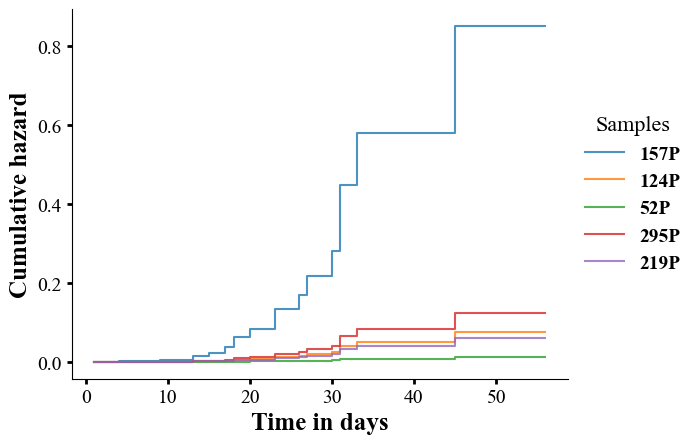

In [9]:
import matplotlib.font_manager as fm 

# ‰∏∫ÊØè‰∏™Ê†∑Êú¨ÁªòÂà∂Á¥ØÁßØÈ£éÈô©ÂáΩÊï∞
for i, (s, sample_name) in enumerate(zip(cumulative_hazard, X_test_sample[0:5].tolist())):
    plt.step(gbdt.unique_times_, s, where="post", label=sample_name,alpha=0.8)  # ‰ΩøÁî®Âçï‰∏™Ê†∑Êú¨ÂêçÁß∞‰Ωú‰∏∫Ê†áÁ≠æ

# Ê∑ªÂä†ÂõæÂΩ¢Ê†áÁ≠æÂíåÂõæ‰æã
plt.ylabel("Cumulative hazard", fontsize=18, fontweight='bold')  # ËÆæÁΩÆ y ËΩ¥Ê†áÁ≠æÁöÑÂ≠ó‰ΩìÂ§ßÂ∞èÂíåÂä†Á≤ó
plt.xlabel("Time in days", fontsize=18, fontweight='bold')  # ËÆæÁΩÆ x ËΩ¥Ê†áÁ≠æÁöÑÂ≠ó‰ΩìÂ§ßÂ∞èÂíåÂä†Á≤ó

# ÂéªÈô§È°∂ÈÉ®ËΩ¥ÂíåÊúÄÂè≥ËæπÁöÑËΩ¥
ax = plt.gca()  # Ëé∑ÂèñÂΩìÂâçÁöÑÂùêÊ†áËΩ¥
ax.spines['top'].set_visible(False)  # ÂÖ≥Èó≠È°∂ÈÉ®ËΩ¥
ax.spines['right'].set_visible(False)  # ÂÖ≥Èó≠ÊúÄÂè≥ËæπÁöÑËΩ¥

# ËÆæÁΩÆÂ≠ó‰ΩìÂ±ûÊÄß
font_properties = fm.FontProperties(weight='bold', size=14)

# ÂéªÈô§Âõæ‰æãÁöÑËæπÊ°ÜÔºåÂπ∂Â∞ÜÂõæ‰æãÊîæÁΩÆÂú®Âè≥‰æß‰∏≠Èó¥
plt.legend(title="Samples", frameon=False, loc='center left', bbox_to_anchor=(1, 0.5), prop=font_properties, title_fontsize=16)  # Âõæ‰æãÊîæÂú®Âè≥‰æß‰∏≠Èó¥
# frameon=FalseÔºöÂéªÈô§Âõæ‰æãÁöÑËæπÊ°Ü 
# bbox_to_anchor=(1, 0.5)ÔºöÁ¨¨‰∏Ä‰∏™ÂÄº1Ë°®Á§∫Âõæ‰æãÁöÑxÂùêÊ†á‰ΩçÁΩÆÔºà1Ë°®Á§∫ÂùêÊ†áËΩ¥ÁöÑÂè≥‰æßÔºâ 
# Á¨¨‰∫å‰∏™ÂÄº0.5Ë°®Á§∫Âõæ‰æãÁöÑyÂùêÊ†á‰ΩçÁΩÆÔºà0.5Ë°®Á§∫ÂùêÊ†áËΩ¥È´òÂ∫¶ÁöÑ‰∏ÄÂçäÔºâ
# ËÆæÁΩÆÂùêÊ†áËΩ¥ÂàªÂ∫¶Ê†áÁ≠æÁöÑÂ≠ó‰ΩìÂ§ßÂ∞èÂíåÂä†Á≤ó
plt.tick_params(axis='both', which='major', labelsize=14, labelcolor='black', width=2)
plt.savefig("1.pdf", format='pdf', bbox_inches='tight', dpi=1200)
plt.show()

È¢ÑÊµãÁîüÂ≠òÂáΩÊï∞

In [10]:
# ‰ΩøÁî®‰ºòÂåñÂêéÁöÑÂèòÈáèÂêç
predicted_survival_functions = gbdt.predict_survival_function(X_test_sel, return_array=True)

# Êü•ÁúãÈ¢ÑÊµãÁöÑÁîüÂ≠òÂáΩÊï∞
print(predicted_survival_functions)

[[0.99958179 0.99893825 0.99788039 0.99634551 0.984883   0.97885007
  0.96336548 0.93931276 0.92088616 0.92088616 0.87550689 0.84392408
  0.80503482 0.80503482 0.80503482 0.75440686 0.63965519 0.63965519
  0.56035781 0.56035781 0.56035781 0.56035781 0.56035781 0.56035781
  0.56035781 0.56035781 0.56035781 0.56035781 0.56035781 0.56035781
  0.42705243 0.42705243 0.42705243 0.42705243 0.42705243 0.42705243
  0.42705243 0.42705243 0.42705243 0.42705243 0.42705243 0.42705243]
 [0.99996322 0.99990661 0.99981346 0.99967816 0.99866166 0.99812231
  0.99672399 0.99451073 0.99277991 0.99277991 0.98837887 0.98519134
  0.98111341 0.98111341 0.98111341 0.9755265  0.96147665 0.96147665
  0.95035322 0.95035322 0.95035322 0.95035322 0.95035322 0.95035322
  0.95035322 0.95035322 0.95035322 0.95035322 0.95035322 0.95035322
  0.92792283 0.92792283 0.92792283 0.92792283 0.92792283 0.92792283
  0.92792283 0.92792283 0.92792283 0.92792283 0.92792283 0.92792283]
 [0.99999374 0.9999841  0.99996824 0.9999452  

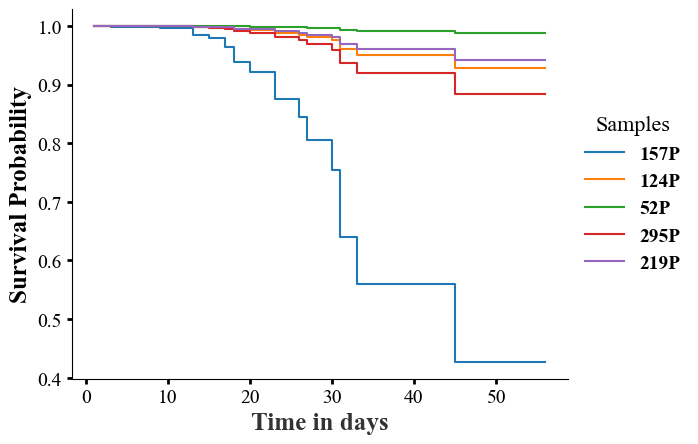

In [11]:
# ‰∏∫ÊØè‰∏™Ê†∑Êú¨ÁªòÂà∂ÁîüÂ≠òÂáΩÊï∞
for i, (s, sample_name) in enumerate(zip(predicted_survival_functions, X_test_sample[0:5].tolist())):
    plt.step(gbdt.unique_times_, s, where="post", label=sample_name)  # ‰ΩøÁî®Âçï‰∏™Ê†∑Êú¨ÂêçÁß∞‰Ωú‰∏∫Ê†áÁ≠æ

# Ê∑ªÂä†ÂõæÂΩ¢Ê†áÁ≠æÂíåÂõæ‰æã
plt.ylabel("Survival Probability", fontsize=18, fontweight='bold')  # ËÆæÁΩÆ y ËΩ¥Ê†áÁ≠æ‰∏∫ÁîüÂ≠òÊ¶ÇÁéá
plt.xlabel("Time in days", fontsize=18, fontweight='bold',alpha=0.8)  # ËÆæÁΩÆ x ËΩ¥Ê†áÁ≠æÁöÑÂ≠ó‰ΩìÂ§ßÂ∞èÂíåÂä†Á≤ó

# ÂéªÈô§È°∂ÈÉ®ËΩ¥ÂíåÊúÄÂè≥ËæπÁöÑËΩ¥
ax = plt.gca()  # Ëé∑ÂèñÂΩìÂâçÁöÑÂùêÊ†áËΩ¥
ax.spines['top'].set_visible(False)  # ÂÖ≥Èó≠È°∂ÈÉ®ËΩ¥
ax.spines['right'].set_visible(False)  # ÂÖ≥Èó≠ÊúÄÂè≥ËæπÁöÑËΩ¥

# ËÆæÁΩÆÂ≠ó‰ΩìÂ±ûÊÄß
font_properties = fm.FontProperties(weight='bold', size=14)

# ÂéªÈô§Âõæ‰æãÁöÑËæπÊ°ÜÔºåÂπ∂Â∞ÜÂõæ‰æãÊîæÁΩÆÂú®Âè≥‰æß‰∏≠Èó¥
plt.legend(title="Samples", frameon=False, loc='center left', bbox_to_anchor=(1, 0.5), prop=font_properties, title_fontsize=16)  # Âõæ‰æãÊîæÂú®Âè≥‰æß‰∏≠Èó¥

# ËÆæÁΩÆÂùêÊ†áËΩ¥ÂàªÂ∫¶Ê†áÁ≠æÁöÑÂ≠ó‰ΩìÂ§ßÂ∞èÂíåÂä†Á≤ó
plt.tick_params(axis='both', which='major', labelsize=14, labelcolor='black', width=2)
# axis='both': Ë°®Á§∫ÂêåÊó∂ËÆæÁΩÆxËΩ¥ÂíåyËΩ¥ÁöÑÂàªÂ∫¶ÂèÇÊï∞
# which='major': Ë°®Á§∫‰ªÖËÆæÁΩÆ‰∏ªÂàªÂ∫¶Ê†áÁ≠æ
# labelsize=14: ËÆæÁΩÆÂàªÂ∫¶Ê†áÁ≠æÁöÑÂ≠ó‰ΩìÂ§ßÂ∞è‰∏∫14
# labelcolor='black': ÂàªÂ∫¶Ê†áÁ≠æÁöÑÂ≠ó‰ΩìÈ¢úËâ≤‰∏∫ÈªëËâ≤
# width=2: ÂàªÂ∫¶Á∫øÁöÑÂÆΩÂ∫¶‰∏∫2
plt.savefig("2.pdf", format='pdf', bbox_inches='tight', dpi=1200)
plt.show()

In [12]:
# ËÆ°ÁÆóÁâπÂæÅÈáçË¶ÅÊÄß
from sklearn.inspection import permutation_importance

result = permutation_importance(gbdt, X_test, y_test, n_repeats=15, random_state=random_state)

# Â∞ÜÁªìÊûúËΩ¨Êç¢‰∏∫ DataFrame Âπ∂ÊåâÁâπÂæÅÈáçË¶ÅÊÄßÊéíÂ∫è
import pandas as pd

importance_df = pd.DataFrame(
    {
        k: result[k]
        for k in (
            "importances_mean",
            "importances_std",
        )
    },
    index=X_test.columns,
).sort_values(by="importances_mean", ascending=False)

importance_df

importances_mean  importances_std
Thymine_pos-150                                     0.019186         0.019266
Carnitine-C12_pos-048                               0.014769         0.021634
AICAR_pos-034                                       0.011318         0.007046
Succinate_neg-079                                   0.008144         0.026161
Hydroxyproline_pos-095                              0.006901         0.009402
Carnitine-C8_pos-056                                0.006625         0.006010
NR_pos-175                                          0.003313         0.007590
Carnitine-C14_pos-049                               0.001656         0.003313
Glutamate_neg-044                                   0.001656         0.016094
7-Methylguanosine_pos-028                           0.001518         0.006739
N-Acetyl-L-alanine_neg-062                          0.000828         0.002705
S-Adenosyl-methionine_pos-139                      -0.000138         0.006391
S-(5'-Adenosyl)-L-homocysteine_neg-075             -0.000276         0.004400
Uridine_neg-088                                    -0.000276         0.013876
3-Indoleacrylic acid_pos-012                       -0.000690         0.015076
SDMA-ADMA_pos-140                                  -0.001932         0.014433
1-Methylnicotinamide_pos-003                       -0.002208         0.043773
Phenylalanine_pos-127                              -0.003037         0.006671
Glycochenodeoxycholate_pos-082                     -0.003313         0.014733
Neopterin_pos-117                                  -0.004003         0.033182
2-Aminoadipic acid_pos-005                         -0.006625         0.003943
Isocitrate_neg-054                                 -0.007591         0.018076
Inosine_pos-099                                    -0.008420         0.008864
Carnitine_pos-047                                  -0.011456         0.009969
N-Acetyl-D-glucosamine 6-phosphate_neg-061         -0.015459         0.014870
Isoleucine_pos-100                                 -0.015873         0.010439
Serotonin_pos-142                                  -0.021394         0.010842
Cystine_pos-068                                    -0.024569         0.017171

In [ ]:
# ‰ΩøÁî®ËÆ≠ÁªÉÂ•ΩÁöÑ GBDT Ê®°Âûã (gbdt_model) Êù•È¢ÑÊµãÊµãËØïÊï∞ÊçÆÁöÑÈ£éÈô©ÂàÜÊï∞
# `gbdt_model.predict(X_test)` ÁîüÊàêÊµãËØïÈõÜ (X_test) ÁöÑÈ£éÈô©ÂàÜÊï∞
test_risk_scores = pd.Series(gbdt.predict(X_test))

# ÊèêÂèñÊµãËØïÊï∞ÊçÆ‰∏≠ "cens" Âíå "time" ÂàóÔºåÂπ∂ËΩ¨Êç¢Êï∞ÊçÆÁ±ªÂûã
test_event_status = y_test["cens"].astype('int')  # ‰∫ã‰ª∂ÊòØÂê¶ÂèëÁîü
test_survival_time = y_test['time'].astype('float')  # ÁîüÂ≠òÊó∂Èó¥

# ÂàõÂª∫‰∏Ä‰∏™ DataFrame Êù•Â≠òÂÇ®ÊµãËØïÈõÜÁöÑÈ£éÈô©ÂàÜÊï∞„ÄÅÁîüÂ≠òÊó∂Èó¥„ÄÅ‰∫ã‰ª∂Áä∂ÊÄÅÂíåÊ†∑Êú¨ÁºñÂè∑
test_data = pd.DataFrame({
    "risk_score": test_risk_scores,
    "survival_time": test_survival_time,
    "event_status": test_event_status,
    "sample_id": X_test_sample
})

# ‰øùÂ≠ò‰∫ã‰ª∂Áä∂ÊÄÅÂàóÔºåÂç≥ÁîüÂ≠ò/Ê≠ª‰∫°ÔºàÊµãËØïÈõÜÔºâ
test_event_status = test_event_status

# ÂØπËÆ≠ÁªÉÈõÜËøõË°åÂêåÊ†∑ÁöÑÊìç‰ΩúÔºåËé∑ÂèñËÆ≠ÁªÉÈõÜÁöÑÈ£éÈô©ÂàÜÊï∞
train_risk_scores = pd.Series(gbdt.predict(X_train))

# ÊèêÂèñËÆ≠ÁªÉÊï∞ÊçÆ‰∏≠ "cens" Âíå "time" ÂàóÔºåÂπ∂ËΩ¨Êç¢Êï∞ÊçÆÁ±ªÂûã
train_event_status = y_train["cens"].astype('int')  # ‰∫ã‰ª∂ÊòØÂê¶ÂèëÁîü
train_survival_time = y_train['time'].astype('float')  # ÁîüÂ≠òÊó∂Èó¥

# ÂàõÂª∫‰∏Ä‰∏™ DataFrame Êù•Â≠òÂÇ®ËÆ≠ÁªÉÈõÜÁöÑÈ£éÈô©ÂàÜÊï∞„ÄÅÁîüÂ≠òÊó∂Èó¥„ÄÅ‰∫ã‰ª∂Áä∂ÊÄÅÂíåÊ†∑Êú¨ÁºñÂè∑
train_data = pd.DataFrame({
    "risk_score": train_risk_scores,
    "survival_time": train_survival_time,
    "event_status": train_event_status,
    "sample_id": X_train_sample
})

# ‰øùÂ≠ò‰∫ã‰ª∂Áä∂ÊÄÅÂàóÔºåÂç≥ÁîüÂ≠ò/Ê≠ª‰∫°ÔºàËÆ≠ÁªÉÈõÜÔºâ
train_event_status = train_event_status

In [ ]:
test_data.head()

risk_score  survival_time  event_status sample_id
0    1.926479           32.0             0      157P
1   -0.504847           41.0             0      124P
2   -2.275323           53.0             0       52P
3    0.001642           56.0             0      295P
4   -0.723065           45.0             0      219P

In [17]:
n_bootstraps = 1000  # ËÆæÁΩÆbootstrapÊ¨°Êï∞

def CI(y_true, y_pred):
    bootstrapped_scores = []  # Â≠òÂÇ®ÊØèÊ¨°bootstrapÁöÑÂàÜÊï∞
    print("auroc score:", roc_auc_score(y_true, y_pred))  # ËæìÂá∫ROC AUCÂæóÂàÜ
    rng = np.random.RandomState(rng_seed)  # ÂàõÂª∫ÈöèÊú∫Êï∞ÁîüÊàêÂô®
    for i in range(n_bootstraps):  # ËøõË°ån_bootstrapsÊ¨°bootstrap
        # ÈÄöËøáÊúâÊîæÂõûÊäΩÊ†∑Ëé∑ÂæóÈ¢ÑÊµãÁ¥¢Âºï
        indices = rng.randint(0, len(y_pred), len(y_pred))
        if len(np.unique(y_true[indices])) < 2:  # Â¶ÇÊûúÊ†∑Êú¨‰∏≠Ê≤°ÊúâËá≥Â∞ë‰∏Ä‰∏™Ê≠£Á±ªÂíå‰∏Ä‰∏™Ë¥üÁ±ªÔºåË∑≥Ëøá
            continue

        score = roc_auc_score(y_true[indices], y_pred[indices])  # ËÆ°ÁÆóROC AUCÂæóÂàÜ
        bootstrapped_scores.append(score)  # Â∞ÜÂæóÂàÜÂä†ÂÖ•ÂàóË°®
        #print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))  # ÂèØÈÄâÔºöËæìÂá∫ÊØèÊ¨°ÁöÑÂæóÂàÜ
    sorted_scores = np.array(bootstrapped_scores)  # ËΩ¨Êç¢‰∏∫NumPyÊï∞ÁªÑ
    sorted_scores.sort()  # ÂØπÂæóÂàÜËøõË°åÊéíÂ∫è

    # ËÆ°ÁÆó90%ÁöÑÁΩÆ‰ø°Âå∫Èó¥ÁöÑ‰∏ãÈôêÂíå‰∏äÈôê
    # ÂèØ‰ª•ÈÄöËøáÂ∞ÜÁôæÂàÜ‰ΩçÊï∞Êîπ‰∏∫0.025Âíå0.975Êù•ËÆ°ÁÆó95%ÁöÑÁΩÆ‰ø°Âå∫Èó¥
    confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]  # 5%ÂàÜ‰ΩçÊï∞‰Ωú‰∏∫‰∏ãÈôê
    confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]  # 95%ÂàÜ‰ΩçÊï∞‰Ωú‰∏∫‰∏äÈôê
    print("Confidence interval for the score: [{:0.3f} - {:0.3f}]".format(
        confidence_lower, confidence_upper))  # ËæìÂá∫ÁΩÆ‰ø°Âå∫Èó¥
    return confidence_lower, confidence_upper  # ËøîÂõûÁΩÆ‰ø°Âå∫Èó¥

auroc score: 0.748
Confidence interval for the score: [0.568 - 0.903]


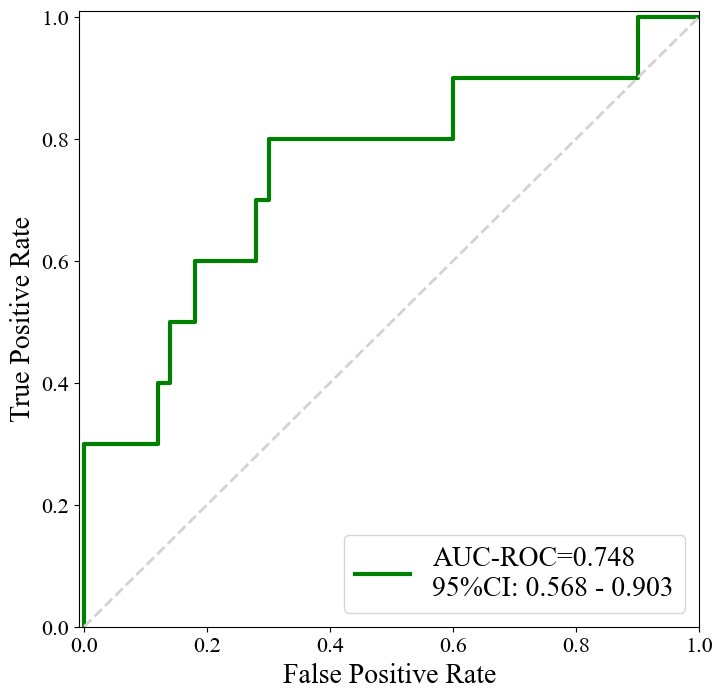

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
rng_seed = 10  # ËÆæÁΩÆÈöèÊú∫ÁßçÂ≠ê
plot_name = "prognostic"  # ËÆæÁΩÆÂõæË°®ÂêçÁß∞
plt.figure(figsize=(8, 8))  # ËÆæÁΩÆÂõæÂΩ¢ÁöÑÂ§ßÂ∞è
# ËÆ°ÁÆóROCÊõ≤Á∫øÁöÑÂÅáÈò≥ÊÄßÁéáÔºàfprÔºâÂíåÁúüÊ≠£ÁéáÔºàtprÔºâ
fpr, tpr, _ = roc_curve(test_event_status, test_risk_scores)
#  _ ÊåáÁöÑÊòØÈòàÂÄº thresholdsÔºåÂ¶ÇÊûúÊúâÁöÑÂÜôÂá∫Êù•ÔºåÂ∞±‰ºöÂëäËØâÊàë‰ª¨ÈòàÂÄºÊòØÂ§öÂ∞ëÔºåÊ≤°ÊúâÂ∞±ÊòØÂøΩÁï•Ëøô‰∏™ËøîÂõûÂÄº
# ËÄåÂà©Áî®Ëøô‰∏™ÂáΩÊï∞ËøõË°åROCÊõ≤Á∫øÁöÑÁªòÂà∂ÔºåÂàô‰ºö‰∏çÊñ≠ÁöÑÊîπÂèòÈòàÂÄºÔºåÂπ∂ËÆ°ÁÆóÂá∫Áõ∏Â∫îÁöÑFPRÂíåTPRÔºå‰ªéËÄåÂæóÂà∞ROCÊõ≤Á∫øÔºå‰ªéËÄåÂÖÖÂàÜÂà©Áî®test_risk_scores
#ËÆ°ÁÆóÂéüÂßãÁöÑROC AUCÂæóÂàÜ
raw = roc_auc_score(test_event_status, test_risk_scores)
# ËÆ°ÁÆó95%ÁöÑÁΩÆ‰ø°Âå∫Èó¥
r, l = CI(test_event_status, test_risk_scores)
# Ê†ºÂºèÂåñÊñáÊú¨ÂÜÖÂÆπÔºöÊòæÁ§∫AUROCÂíå95%ÁΩÆ‰ø°Âå∫Èó¥
tex = 'AUC-ROC={:0.3f}\n95%CI: {:0.3f} - {:0.3f}'.format(raw, r, l)
# ÁªòÂà∂ROCÊõ≤Á∫øÔºåÈ¢úËâ≤‰∏∫ÁªøËâ≤ÔºåÁ∫øÂÆΩÂä†Á≤ó
plt.plot(fpr, tpr, lw=3, color='green', label=tex)
# ÁªòÂà∂ÂèÇËÄÉÁöÑÈöèÊú∫ÁåúÊµãÁ∫øÔºà45Â∫¶Á∫øÔºâÔºåÈ¢úËâ≤‰∏∫ÊµÖÁÅ∞Ëâ≤
plt.plot([0, 1], [0, 1], color='lightgray', lw=2, linestyle='--')
# ËÆæÁΩÆËΩ¥ÁöÑËåÉÂõ¥
plt.xlim([-0.008, 1.0])
plt.ylim([0.0, 1.01])
# ËÆæÁΩÆxËΩ¥ÂíåyËΩ¥Ê†áÁ≠æÁöÑÂ≠ó‰ΩìÂ§ßÂ∞è
plt.xlabel('False Positive Rate', fontdict={'size': 20})
plt.ylabel('True Positive Rate', fontdict={'size': 20})
# ËÆæÁΩÆÂàªÂ∫¶Ê†áÁ≠æÁöÑÂ≠ó‰ΩìÂ§ßÂ∞è
plt.yticks(size=16)
plt.xticks(size=16)
plt.legend(loc="lower right", fontsize=20)
plt.savefig("3.pdf", format='pdf', bbox_inches='tight', dpi=1200)
plt.show()

ÁªòÂà∂ROCÊõ≤Á∫øÂõæ‰ΩøÁî®ÁöÑÊòØÈ£éÈô©ÂàÜÊï∞ÔºåËÄå‰∏çÊòØÈ¢ÑÊµãÊ¶ÇÁéá

ÁîüÂ≠òÂàÜÊûê‰∏≠C-index Âíå AUC ÁöÑ‰∏ªË¶ÅÂå∫Âà´Ôºö  
1. ÂÆö‰πâÂíåËÆ°ÁÆóÊñπÂºè‰∏çÂêå  
C-indexÔºàConcordance IndexÔºâÔºö  

‰∏ìÈó®Áî®‰∫éÁîüÂ≠òÂàÜÊûêÁöÑËØÑ‰º∞ÊåáÊ†á  
Ë°°ÈáèÊ®°ÂûãÂØπÊÇ£ËÄÖÊéíÂ∫èÁöÑÂáÜÁ°ÆÊÄß  
ËÆ°ÁÆóÊâÄÊúâÂèØÊØîËæÉÊÇ£ËÄÖÂØπ‰∏≠ÔºåÊ®°ÂûãÊ≠£Á°ÆÊéíÂ∫èÁöÑÊØî‰æã  
ÂØπ‰∫é‰∏ÄÂØπÊÇ£ËÄÖÔºåÂ¶ÇÊûúÈ£éÈô©ËØÑÂàÜÈ´òÁöÑÊÇ£ËÄÖÁ°ÆÂÆûÊõ¥Êó©ÂèëÁîü‰∫ã‰ª∂ÔºåÂàôËÆ§‰∏∫ÊéíÂ∫èÊ≠£Á°Æ  
AUCÔºàArea Under ROC CurveÔºâÔºö  

ÂéüÊú¨ÊòØÁî®‰∫é‰∫åÂàÜÁ±ªÈóÆÈ¢òÁöÑËØÑ‰º∞ÊåáÊ†á  
Ë°°ÈáèÊ®°ÂûãÂå∫ÂàÜÊ≠£Ë¥üÊ†∑Êú¨ÁöÑËÉΩÂäõ  
ÈÄöËøáËÆ°ÁÆóROCÊõ≤Á∫ø‰∏ãÈù¢ÁßØÂæóÂà∞  
ÈúÄË¶ÅÂ∞ÜÁîüÂ≠òÂàÜÊûêÈóÆÈ¢òËΩ¨Âåñ‰∏∫‰∫åÂàÜÁ±ªÈóÆÈ¢òÊâçËÉΩËÆ°ÁÆó  
C-indexÂíåAUCÈÉΩÊòØÂ∏∏Áî®ÁöÑËØÑ‰º∞ÊåáÊ†áÔºå‰ΩÜC-indexÊõ¥ÈÄÇÂêà‰∫éÁîüÂ≠òÂàÜÊûêÈóÆÈ¢òÔºåAUCÊõ¥ÈÄÇÂêà‰∫é‰∫åÂàÜÁ±ªÈóÆÈ¢ò  
C-indexÊòØ‰∏ÄÁßçÂ∏∏Áî®ÁöÑËØÑ‰º∞Ê®°ÂûãÊÄßËÉΩÁöÑÊåáÊ†áÔºåÂÆÉÂèØ‰ª•ËÆ°ÁÆóÊ®°ÂûãÂú®È¢ÑÊµãÊÇ£ËÄÖÁîüÂ≠òÊó∂Èó¥Êó∂ÔºåÊ≠£Á°ÆÊéíÂ∫èÁöÑÊØî‰æã„ÄÇAUCÔºàArea Under ROC CurveÔºâÊòØ‰∏ÄÁßçÂ∏∏Áî®ÁöÑËØÑ‰º∞‰∫åÂàÜÁ±ªÊ®°ÂûãÊÄßËÉΩÁöÑÊåáÊ†áÔºåÂÆÉÂèØ‰ª•ËÆ°ÁÆóÊ®°ÂûãÂú®È¢ÑÊµãÊ≠£Ë¥üÊ†∑Êú¨Êó∂ÔºåÊ≠£Á°ÆÂàÜÁ±ªÁöÑÊØî‰æã„ÄÇ  
c_index = gbdt.score(X_test, y_test)  
ËøôË°å‰ª£Á†ÅÁõ¥Êé•‰ΩøÁî®‰∫ÜÁîüÂ≠òÊï∞ÊçÆÔºàÊó∂Èó¥Âíå‰∫ã‰ª∂Áä∂ÊÄÅÔºâËÆ°ÁÆóC-indexÔºåÊòØÁîüÂ≠òÂàÜÊûêÁöÑÊ†áÂáÜËØÑ‰º∞ÊñπÊ≥ï„ÄÇ  
fpr, tpr, _ = roc_curve(test_event_status, test_risk_scores)  
raw = roc_auc_score(test_event_status, test_risk_scores)  
ËøôÈáåÈúÄË¶ÅÂ∞ÜÁîüÂ≠òÊï∞ÊçÆËΩ¨Âåñ‰∏∫‰∫åÂàÜÁ±ªÈóÆÈ¢òÁöÑÂΩ¢ÂºèÔºö  
 1. Â∞Ü‰∫ã‰ª∂Áä∂ÊÄÅËΩ¨Êç¢‰∏∫‰∫åÂàÜÁ±ªÈóÆÈ¢òÔºåÂç≥Â∞Ü‰∫ã‰ª∂ÂèëÁîüÔºà1ÔºâËΩ¨Êç¢‰∏∫Ê≠£Ê†∑Êú¨Ôºà1ÔºâÔºåÂ∞Ü‰∫ã‰ª∂Êú™ÂèëÁîüÔºà0ÔºâËΩ¨Êç¢‰∏∫Ë¥üÊ†∑Êú¨Ôºà0Ôºâ„ÄÇ  
 2. Â∞ÜÁîüÂ≠òÊó∂Èó¥ËΩ¨Âåñ‰∏∫‰∫åÂàÜÁ±ªÈóÆÈ¢òÔºåÂç≥Â∞ÜÁîüÂ≠òÊó∂Èó¥Â∞è‰∫éÁ≠â‰∫éÊüê‰∏™ÈòàÂÄºÔºàÂ¶Ç5Âπ¥ÔºâÁöÑÊ†∑Êú¨ËΩ¨Êç¢‰∏∫Ê≠£Ê†∑Êú¨Ôºà1ÔºâÔºåÂ∞ÜÁîüÂ≠òÊó∂Èó¥Â§ß‰∫éÊüê‰∏™ÈòàÂÄºÔºàÂ¶Ç5Âπ¥ÔºâÁöÑÊ†∑Êú¨ËΩ¨Êç¢‰∏∫Ë¥üÊ†∑Êú¨Ôºà0Ôºâ„ÄÇ  
test_event_statusÔºö‰∫ã‰ª∂Áä∂ÊÄÅÔºàÈÄöÂ∏∏ÊòØ‰∫åÂàÜÁ±ªÔºöÂèëÁîü‰∫ã‰ª∂/Êú™ÂèëÁîü‰∫ã‰ª∂Ôºâ  
test_risk_scoresÔºöÈ£éÈô©ËØÑÂàÜÔºàÈÄöÂ∏∏ÊòØÊ®°ÂûãËæìÂá∫ÁöÑÈ£éÈô©ÂÄºÔºâ  



fpr, tpr, _ = roc_curve(test_event_status, test_risk_scores)‰∏∫‰ªÄ‰πàËøô‰∏™ÂèØ‰ª•ËøîÂõûÂ§ö‰∏™ÁúüÈò≥ÊÄßÁéáÔºåÂ§ö‰∏™ÂÅáÈò≥ÊÄßÁéáÔºåÁêÜËÆ∫‰∏ä‰∏ÄÁªÑÊï∞ÊçÆÁöÑÈ¢ÑÊµãÁªìÊûúÂíåÁúüÂÆûÁªìÊûúÊëÜÂú®ËøôÔºåÂ∞±Â∫îËØ•ÊòØÂè™Êúâ‰∏Ä‰∏™Ê∑∑Ê∑ÜÁü©ÈòµÔºåÊâÄ‰ª•Â∞±Âè™Êúâ‰∏Ä‰∏™ÁúüÈò≥ÊÄßÁéáÂíå‰∏Ä‰∏™ÂÅáÈò≥ÊÄßÁéáÁöÑÂïä  
‰º†ÁªüÂàÜÁ±ª vs ROCÊõ≤Á∫øÂàÜÁ±ªÔºö  
‰º†ÁªüÂàÜÁ±ªÔºàÂçï‰∏™ÈòàÂÄºÔºâÔºö    
‰æãÂ¶ÇÔºåÂõ∫ÂÆöÈòàÂÄº=0.5  
threshold = 0.5  
predictions = (test_risk_scores >= 0.5).astype(int)  # Âè™Êúâ‰∏ÄÊ¨°ÂàÜÁ±ª  
Âè™ËÉΩÂæóÂà∞‰∏Ä‰∏™Ê∑∑Ê∑ÜÁü©ÈòµÔºå‰∏Ä‰∏™TPRÔºå‰∏Ä‰∏™FPR  
ROCÊõ≤Á∫øÂàÜÁ±ªÔºàÂ§ö‰∏™ÈòàÂÄºÔºâÔºö  
‰ΩøÁî®ÊâÄÊúâÂèØËÉΩÁöÑÈòàÂÄº  
unique_scores = np.unique(test_risk_scores)  # [0.1, 0.35, 0.4, 0.6, 0.8]  
ÂØπÊØè‰∏™ÈòàÂÄºÈÉΩËøõË°å‰∏ÄÊ¨°ÂàÜÁ±ªÔºåÂæóÂà∞Â§ö‰∏™Ê∑∑Ê∑ÜÁü©Èòµ  
Âõ†Ê≠§ÂæóÂà∞Â§ö‰∏™TPRÂíåFPRÂÄº  
ROCÊõ≤Á∫øÔºö  
ROCÊõ≤Á∫øÊòØ‰∏Ä‰∏™TPRÂíåFPRÁöÑÊõ≤Á∫ø  
TPR = TP / (TP + FN)  
FPR = FP / (FP + TN)  
ROCÊõ≤Á∫øÁöÑXËΩ¥ÊòØFPRÔºåYËΩ¥ÊòØTPR  
ROCÊõ≤Á∫øË∂äÂêëÂè≥ÔºåË∂äÂêë‰∏äÔºåË∂äÊé•ËøëÔºà1Ôºå1Ôºâ  
ROCÊõ≤Á∫øË∂äÂêëÂ∑¶ÔºåË∂äÂêë‰∏ãÔºåË∂äÊé•ËøëÔºà0Ôºå0Ôºâ  
‰Ω†ÁöÑÁêÜËß£Âú®Âçï‰∏™ÈòàÂÄºÊÉÖÂÜµ‰∏ãÊòØÊ≠£Á°ÆÁöÑÔºö‰∏ÄÁªÑÈ¢ÑÊµãÁªìÊûúÂíåÁúüÂÆûÁªìÊûúÁ°ÆÂÆûÂè™ÂØπÂ∫î‰∏Ä‰∏™Ê∑∑Ê∑ÜÁü©ÈòµÔºå‰∏Ä‰∏™TPRÂíå‰∏Ä‰∏™FPR„ÄÇ  

‰ΩÜROCÊõ≤Á∫øÁöÑÁâπÊÆä‰πãÂ§ÑÂú®‰∫éÔºö  

ÂÆÉ‰∏çÊòØ‰ΩøÁî®‰∏Ä‰∏™Âõ∫ÂÆöÈòàÂÄº  
ËÄåÊòØËá™Âä®Â∞ùËØïÂ§ö‰∏™‰∏çÂêåÁöÑÈòàÂÄºÔºàÈÄöÂ∏∏ÊòØÊØè‰∏™ÂîØ‰∏ÄÁöÑÈ¢ÑÊµãÂàÜÊï∞‰Ωú‰∏∫‰∏Ä‰∏™ÈòàÂÄºÔºâ  
ÂØπÊØè‰∏™ÈòàÂÄºÈÉΩËøõË°å‰∏ÄÊ¨°ÂÆåÊï¥ÁöÑÂàÜÁ±ªËØÑ‰º∞  
Âõ†Ê≠§ÂæóÂà∞Â§ö‰∏™Ê∑∑Ê∑ÜÁü©ÈòµÔºåÂ§ö‰∏™TPRÂíåFPRÂÄº  
Ëøô‰∫õ(TPR, FPR)ÁÇπËøûÊé•Ëµ∑Êù•Â∞±ÂΩ¢Êàê‰∫ÜROCÊõ≤Á∫ø  


‰∏∫‰ªÄ‰πàÊàëÂèëÁé∞Âú®ROCÊõ≤Á∫ø‰∏≠Âú®ÁúüÈò≥ÊÄßÁéáÊé•Ëøë1ÁöÑÊó∂ÂÄôÂÅáÈò≥ÊÄßÁéá‰πüÊé•Ëøë1Âë¢  
Ê†∏Êú¨ÂéüÂõ†ÔºöÈòàÂÄºË∂ãËøë‰∫é0Êó∂ÁöÑÁé∞Ë±°  
ÂΩìROCÊõ≤Á∫øÁöÑÁúüÊ≠£ÁéáÊé•Ëøë1Êó∂ÔºåÈÄöÂ∏∏ÊÑèÂë≥ÁùÄÂàÜÁ±ªÈòàÂÄºÈùûÂ∏∏‰ΩéÔºåÊé•Ëøë‰∫é0ÔºåËøô‰ºöÂØºËá¥Âá†‰πéÊâÄÊúâÊ†∑Êú¨ÈÉΩË¢´È¢ÑÊµã‰∏∫Ê≠£Á±ª„ÄÇ  
Êï∞Â≠¶‰∏äÁöÑÂøÖÁÑ∂ÊÄß  
ÂΩìÈòàÂÄºÈùûÂ∏∏‰ΩéÔºàÊé•Ëøë0ÔºâÊó∂Ôºö  

Âá†‰πéÊâÄÊúâÊ†∑Êú¨ÁöÑÈ¢ÑÊµãÂàÜÊï∞ÈÉΩ >= ÈòàÂÄº  
Âõ†Ê≠§Âá†‰πéÊâÄÊúâÊ†∑Êú¨ÈÉΩË¢´È¢ÑÊµã‰∏∫Ê≠£Á±ª  
ËøôÂØºËá¥Ôºö  
TPR ‚âà 1ÔºàÂá†‰πéÊâÄÊúâÊ≠£‰æãÈÉΩË¢´Ê£ÄÊµãÂà∞Ôºâ  
FPR ‚âà 1ÔºàÂá†‰πéÊâÄÊúâË¥ü‰æãÈÉΩË¢´ËØØÊä•Ôºâ  
ÂÆûÈôÖÊÑè‰πâÔºö  
ËøôÁßçÁé∞Ë±°Âú®ÂÆûÈôÖ‰∏≠ÊòØÊúâÊÑè‰πâÁöÑÔºö  

È´òTPR‰ΩÜÈ´òFPRÁöÑÊÉÖÂÜµÂú®ÂåªÂ≠¶ËØäÊñ≠‰∏≠ÂæàÂ∏∏ËßÅÔºö  

‰∏∫‰∫Ü‰∏çÊºèËØäÔºàÈ´òTPRÔºâÔºåÂèØËÉΩÈúÄË¶ÅÈôç‰ΩéËØäÊñ≠Ê†áÂáÜ  
‰ΩÜËøô‰ºöÂØºËá¥Êõ¥Â§öËØØËØäÔºàÈ´òFPRÔºâ  
ËøôÊòØROCÊõ≤Á∫øÁöÑÊú¨Ë¥®ÁâπÂæÅÔºö  

ROCÊõ≤Á∫øÂ±ïÁ§∫‰∫ÜÂú®ÊâÄÊúâÂèØËÉΩÁöÑÂàÜÁ±ªÈòàÂÄº‰∏ãÊ®°ÂûãÁöÑÊùÉË°°  
ÂÆåÁæéÁöÑÂàÜÁ±ªÂô®‰ºöÂ∞ΩÂèØËÉΩÈù†ËøëÂ∑¶‰∏äËßí(0,1)  
ÈöèÊú∫ÂàÜÁ±ªÂô®ÁöÑROCÊõ≤Á∫øÊòØËøûÊé•(0,0)Âíå(1,1)ÁöÑÂØπËßíÁ∫ø  

ROCÊõ≤Á∫øÁöÑAUCÂÄºË∂äÂ§ßÔºåÊ®°ÂûãË∂äÊé•ËøëÂÆåÁæéÁöÑÂàÜÁ±ªÂô®  
AUCÂÄºË∂äÂ∞èÔºåÊ®°ÂûãË∂äÊé•ËøëÈöèÊú∫ÂàÜÁ±ªÂô®  

AUCÂÄºË∂äÊé•Ëøë1ÔºåÊ®°ÂûãË∂äÊé•ËøëÂÆåÁæéÁöÑÂàÜÁ±ªÂô®  
AUCÂÄºË∂äÊé•Ëøë0.5ÔºåÊ®°ÂûãË∂äÊé•ËøëÈöèÊú∫ÂàÜÁ±ªÂô®  

AUCÂÄºË∂äÊé•Ëøë0.5ÔºåÊ®°ÂûãË∂äÊé•ËøëÈöèÊú∫ÂàÜÁ±ªÂô®  
AUCÂÄºË∂äÊé•Ëøë0ÔºåÊ®°ÂûãË∂äÊé•ËøëÊúÄÂ∑ÆÂàÜÁ±ªÂô®  


In [20]:
print("ÂÆûÈôÖÂ∫îÁî®‰∏≠ÁöÑËß£ËØª:")
print("=" * 30)
print("ÂΩìROCÊõ≤Á∫ø‰∏äÊüêÁÇπÊé•Ëøë(1,1)Êó∂:")
print("  ‚úÖ ‰ºòÁÇπ: Âá†‰πéÊâÄÊúâÁúüÊ≠£ÁöÑÊÇ£ËÄÖÈÉΩË¢´Ê£ÄÊµãÂá∫Êù•‰∫Ü(TPR‚âà1)")
print("  ‚ùå Áº∫ÁÇπ: ÂêåÊó∂‰πüÊúâÂæàÂ§öÂÅ•Â∫∑‰∫∫Ë¢´ËØØËØä‰∏∫ÊÇ£ËÄÖ(FPR‚âà1)")
print("  üí° Â∫îÁî®: ÈÄÇÁî®‰∫é‰∏çËÉΩÊºèËØäÁöÑÂú∫ÊôØ(Â¶ÇÁôåÁóáÁ≠õÊü•)")
print("  ‚ö†Ô∏è  Ê≥®ÊÑè: ÈúÄË¶ÅËÄÉËôëÊàêÊú¨ÊïàÁõäÂπ≥Ë°°")

ÂÆûÈôÖÂ∫îÁî®‰∏≠ÁöÑËß£ËØª:
ÂΩìROCÊõ≤Á∫ø‰∏äÊüêÁÇπÊé•Ëøë(1,1)Êó∂:
  ‚úÖ ‰ºòÁÇπ: Âá†‰πéÊâÄÊúâÁúüÊ≠£ÁöÑÊÇ£ËÄÖÈÉΩË¢´Ê£ÄÊµãÂá∫Êù•‰∫Ü(TPR‚âà1)
  ‚ùå Áº∫ÁÇπ: ÂêåÊó∂‰πüÊúâÂæàÂ§öÂÅ•Â∫∑‰∫∫Ë¢´ËØØËØä‰∏∫ÊÇ£ËÄÖ(FPR‚âà1)
  üí° Â∫îÁî®: ÈÄÇÁî®‰∫é‰∏çËÉΩÊºèËØäÁöÑÂú∫ÊôØ(Â¶ÇÁôåÁóáÁ≠õÊü•)
  ‚ö†Ô∏è  Ê≥®ÊÑè: ÈúÄË¶ÅËÄÉËôëÊàêÊú¨ÊïàÁõäÂπ≥Ë°°
